In [1]:
pip install pgmpy numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00


Exercise 2: Building a Simple DBN

In [3]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()
model.add_edges_from([(("Rain", 0), ("Sprinkler", 0)), (("Rain", 0), ("Rain", 1))])

# Add CPDs to the model
model.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1)

# Define CPDs (Conditional Probability Distributions)
cpd_rain_0 = TabularCPD(("Rain", 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(("Sprinkler", 0), 2, [[0.2, 0.5], [0.8, 0.5]], evidence=[("Rain", 0)], evidence_card=[2])
cpd_rain_1 = TabularCPD(("Rain", 1), 2, [[0.6, 0.4], [0.4, 0.6]], evidence=[("Rain", 0)], evidence_card=[2])



Exercise 3: Performing Inference

In [4]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

model = DBN()

# Add edges for intra-time and inter-time dependencies
model.add_edges_from([(("Rain", 0), ("Sprinkler", 0)), (("Rain", 0), ("Rain", 1))])

# Define CPDs (Conditional Probability Distributions)
cpd_rain_0 = TabularCPD(("Rain", 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(("Sprinkler", 0), 2, [[0.2, 0.5], [0.8, 0.5]], evidence=[("Rain", 0)], evidence_card=[2])
cpd_rain_1 = TabularCPD(("Rain", 1), 2, [[0.6, 0.4], [0.4, 0.6]], evidence=[("Rain", 0)], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1)

# Explicitly add nodes to the model - This fixes the problem
model.add_nodes_from([("Rain", 0), ("Sprinkler", 0), ("Rain", 1)])

Exercise 4: Visualizing the DBN


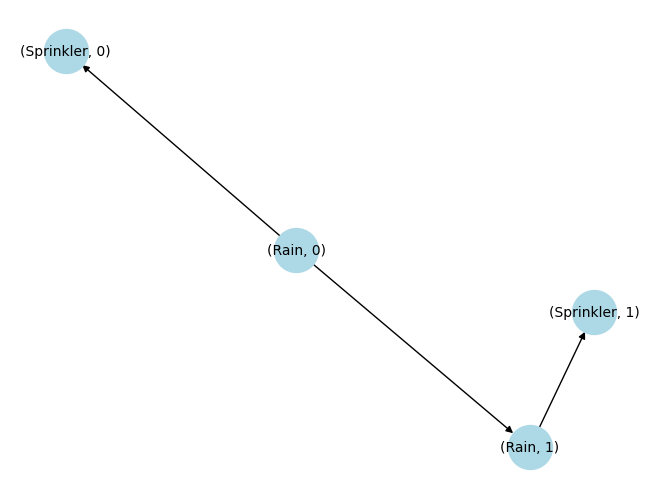

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import DynamicBayesianNetwork as DBN

# ... (Your DBN model creation code) ...

# Create a NetworkX DiGraph object
graph = nx.DiGraph()

# Add edges from the DBN model to the NetworkX graph
for edge in model.edges():
    graph.add_edge(edge[0], edge[1])

# Draw the graph with labels, customized node size, color, and font size
nx.draw(graph, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)

# Display the graph
plt.show()